# DS-SF-23 | Codealong 07 | Introduction to Regression and Model Fit, Part 2

In [60]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import feature_selection, linear_model

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')

## Activity | Model's F-statistic

In [61]:
df = pd.read_csv(os.path.join('..', '..', '07', 'datasets', 'zillow-07-start.csv'), index_col = 'ID')

In [62]:
model = smf.ols(formula = 'SalePrice ~ IsAStudio', data = df).fit()

## Accessing the model's F-value and its p-value

### F-value (with significance level of `5%`)

In [63]:
model.fvalue

0.077751247187816605

### Corresponding p-value

In [64]:
model.f_pvalue

0.78042689060360249

## Part A - Linear Modeling with `sklearn`

In [65]:
subset_df = df.dropna(axis = 'index', subset = ['Size', 'LotSize', 'IsAStudio'])

In [66]:
def linear_modeling_with_sklearn(X, y):
    model = linear_model.LinearRegression(fit_intercept = True)
    model.fit(X, y)

    print('F-statistic (performed for each regressor independently)')
    print('- F-value', feature_selection.f_regression(X, y)[0])
    print('- p-value', feature_selection.f_regression(X, y)[1])
    print('R^2 =', model.score(X, y))
    print('Coefficients')
    print('- beta_0 (intercept) =', model.intercept_)
    print('- beta_n (n > 0)     =', model.coef_)

### SalePrice ~ IsAStudio with `statsmodels`

In [67]:
smf.ols(formula = 'SalePrice ~ IsAStudio', data = subset_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2519
Date:                Tue, 31 May 2016   Prob (F-statistic):              0.616
Time:                        20:30:46   Log-Likelihood:                -1159.0
No. Observations:                 545   AIC:                             2322.
Df Residuals:                     543   BIC:                             2331.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.5571      0.088     17.615      0.000         1.383     1.731
IsAStudio      0.2589      0.516      0.502      0.616        -0.755     1.272
==============================================================================
Omnibus:                      860.527   Durbin-Watson:                   1.337
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           301122.117
Skew:                           8.992   Prob(JB):                         0.00
Kurtosis:                     116.741   Cond. No.                         5.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### SalePrice ~ IsAStudio with `sklearn` (Simple Linear Modeling)

In [68]:
X = subset_df[ ['IsAStudio'] ]
y = subset_df.SalePrice

linear_modeling_with_sklearn(X, y)

F-statistic (performed for each regressor independently)
- F-value [ 0.25187926]
- p-value [ 0.61595836]
R^2 = 0.000463650973037
Coefficients
- beta_0 (intercept) = 1.55707559924
- beta_n (n > 0)     = [ 0.2589244]


### SalePrice ~ Size + LotSize with `statsmodels`

In [69]:
smf.ols(formula = 'SalePrice ~ Size + LotSize', data = subset_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     78.29
Date:                Tue, 31 May 2016   Prob (F-statistic):           1.36e-30
Time:                        20:30:46   Log-Likelihood:                -1090.0
No. Observations:                 545   AIC:                             2186.
Df Residuals:                     542   BIC:                             2199.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.1902      0.173     -1.098      0.273        -0.530     0.150
Size           0.8171      0.069     11.907      0.000         0.682     0.952
LotSize        0.0500      0.037      1.362      0.174        -0.022     0.122
==============================================================================
Omnibus:                      974.589   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           812622.772
Skew:                          11.225   Prob(JB):                         0.00
Kurtosis:                     190.833   Cond. No.                         9.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### SalePrice ~ IsAStudio with `sklearn` (Multiple Linear Modeling)

In [70]:
X = subset_df[ ['Size', 'LotSize'] ]
y = subset_df.SalePrice

linear_modeling_with_sklearn(X, y)

F-statistic (performed for each regressor independently)
- F-value [ 154.47734612   11.74608887]
- p-value [  2.18094764e-31   6.55921409e-04]
R^2 = 0.224134357118
Coefficients
- beta_0 (intercept) = -0.190237755455
- beta_n (n > 0)     = [ 0.81709073  0.05004893]


# Advertising dataset

In [71]:
df = pd.read_csv(os.path.join('..', 'datasets', 'advertising.csv'))

In [72]:
df 

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
193,38.2,3.7,13.8,7.6
194,94.2,4.9,8.1,9.7
195,177.0,9.3,6.4,12.8
196,283.6,42.0,66.2,25.5


## Plots

### Sales ~ TV

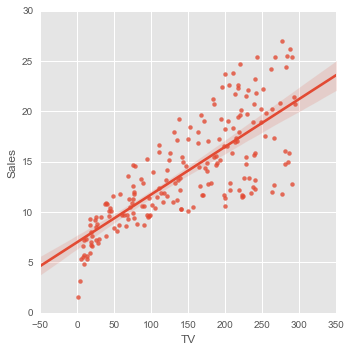

In [73]:
#plot the data with TV as DV and Sales as IV
sns.lmplot('TV', 'Sales', df)

### Sales ~ Radio

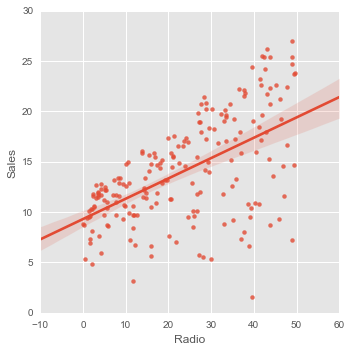

In [74]:
sns.lmplot('Radio', 'Sales', df)

### Sales ~ Newspaper

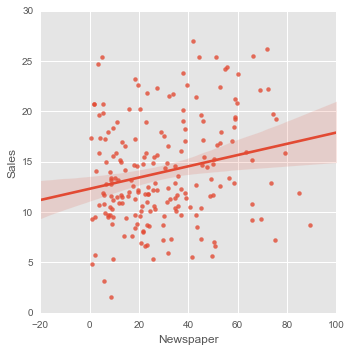

In [75]:
sns.lmplot('Newspaper', 'Sales', df)

## Simple linear regressions

### Sales ~ TV

In [76]:
model_tv = smf.ols(formula = 'Sales ~ TV', data = df).fit()

In [77]:
model_tv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     302.8
Date:                Tue, 31 May 2016   Prob (F-statistic):           1.29e-41
Time:                        20:30:49   Log-Likelihood:                -514.27
No. Observations:                 198   AIC:                             1033.
Df Residuals:                     196   BIC:                             1039.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0306      0.462     15.219      0.000         6.120     7.942
TV             0.0474      0.003     17.400      0.000         0.042     0.053
==============================================================================
Omnibus:                        0.404   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.817   Jarque-Bera (JB):                0.551
Skew:                          -0.062   Prob(JB):                        0.759
Kurtosis:                       2.774   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Sales ~ Radio

In [78]:
model_radio = smf.ols(formula = 'Sales ~ Radio', data = df).fit()

In [79]:
model_radio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     97.69
Date:                Tue, 31 May 2016   Prob (F-statistic):           5.99e-19
Time:                        20:30:49   Log-Likelihood:                -566.70
No. Observations:                 198   AIC:                             1137.
Df Residuals:                     196   BIC:                             1144.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      9.3166      0.560     16.622      0.000         8.211    10.422
Radio          0.2016      0.020      9.884      0.000         0.161     0.242
==============================================================================
Omnibus:                       20.193   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.115
Skew:                          -0.785   Prob(JB):                     9.56e-06
Kurtosis:                       3.582   Cond. No.                         51.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Sales ~ Newspaper

In [80]:
model_newspaper = smf.ols(formula = 'Sales ~ Newspaper', data = df).fit()

In [81]:
model_newspaper.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     9.927
Date:                Tue, 31 May 2016   Prob (F-statistic):            0.00188
Time:                        20:30:50   Log-Likelihood:                -601.84
No. Observations:                 198   AIC:                             1208.
Df Residuals:                     196   BIC:                             1214.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     12.3193      0.639     19.274      0.000        11.059    13.580
Newspaper      0.0558      0.018      3.151      0.002         0.021     0.091
==============================================================================
Omnibus:                        5.835   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.303
Skew:                           0.333   Prob(JB):                       0.0706
Kurtosis:                       2.555   Cond. No.                         63.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Residuals

### Sales ~ TV

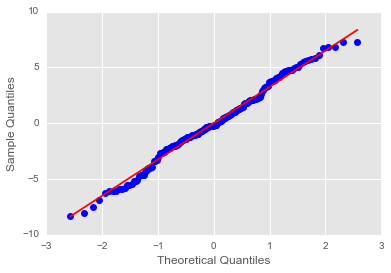

In [82]:
figure = sm.qqplot(model_tv.resid, line = 's')

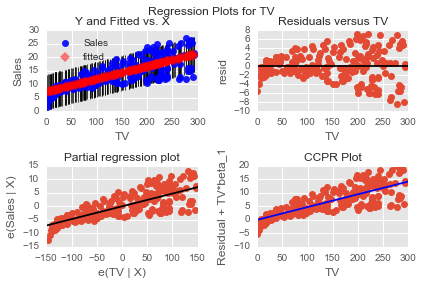

In [83]:
figure = sm.graphics.plot_regress_exog(model_tv, 'TV')

### Sales ~ Radio

In [84]:
figure = sm.qqplot(model)

AttributeError: 'OLSResults' object has no attribute 'shape'

In [ ]:
# TODO

### Sales ~ Newspaper

In [85]:
# TODO

In [86]:
# TODO

### Sales ~ TV + Radio + Newspaper

In [ ]:
# TODO

In [ ]:
# TODO

### Sales ~ TV + Radio

In [28]:
model = smf.ols(formula = 'Sales ~ TV + Radio', data = df).fit()

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     834.4
Date:                Tue, 31 May 2016   Prob (F-statistic):           2.60e-96
Time:                        18:46:44   Log-Likelihood:                -383.26
No. Observations:                 198   AIC:                             772.5
Df Residuals:                     195   BIC:                             782.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9315      0.297      9.861      0.000         2.345     3.518
TV             0.0457      0.001     32.385      0.000         0.043     0.048
Radio          0.1880      0.008     23.182      0.000         0.172     0.204
==============================================================================
Omnibus:                       59.228   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.127
Skew:                          -1.321   Prob(JB):                     3.06e-32
Kurtosis:                       6.257   Cond. No.                         423.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

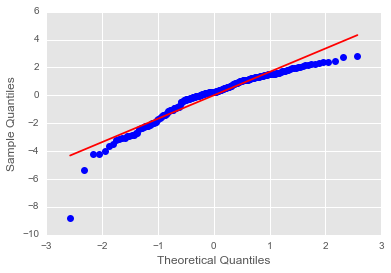

In [31]:
figure = sm.qqplot(model.resid, line = 's')

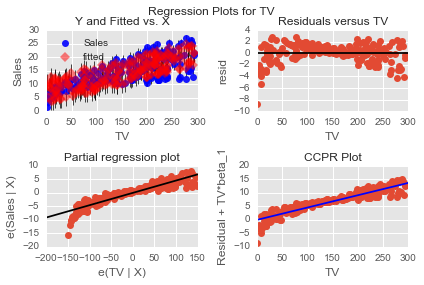

In [32]:
figure = sm.graphics.plot_regress_exog(model, 'TV')

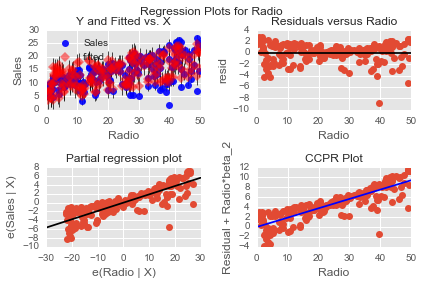

In [33]:
figure = sm.graphics.plot_regress_exog(model, 'Radio')

## Part B - Interaction Effects

### Sales ~ TV + Radio + TV * Radio

In [34]:
model = smf.ols(formula = 'Sales ~ TV + Radio + TV * Radio', data= df).fit()

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1934.
Date:                Tue, 31 May 2016   Prob (F-statistic):          3.19e-144
Time:                        18:54:37   Log-Likelihood:                -267.07
No. Observations:                 198   AIC:                             542.1
Df Residuals:                     194   BIC:                             555.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.7577      0.247     27.304      0.000         6.270     7.246
TV             0.0190      0.002     12.682      0.000         0.016     0.022
Radio          0.0276      0.009      3.089      0.002         0.010     0.045
TV:Radio       0.0011   5.27e-05     20.817      0.000         0.001     0.001
==============================================================================
Omnibus:                      126.182   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1151.060
Skew:                          -2.306   Prob(JB):                    1.12e-250
Kurtosis:                      13.875   Cond. No.                     1.78e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

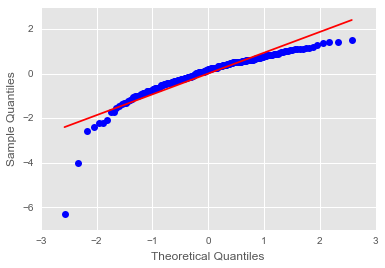

In [36]:
figure = sm.qqplot(model.resid, line = 's')

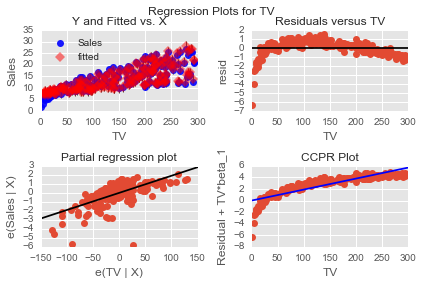

In [40]:
figure = sm.graphics.plot_regress_exog(model, 'TV')

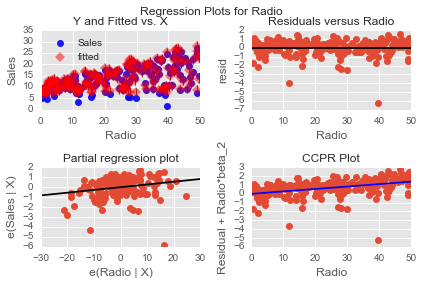

In [39]:
figure = sm.graphics.plot_regress_exog(model, 'Radio')

In [41]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
193,38.2,3.7,13.8,7.6
194,94.2,4.9,8.1,9.7
195,177.0,9.3,6.4,12.8
196,283.6,42.0,66.2,25.5


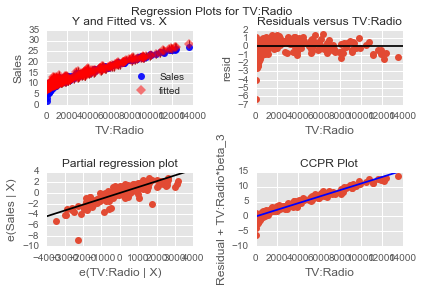

In [38]:
figure = sm.graphics.plot_regress_exog(model, 'TV:Radio')

## Part C - Binary/Dummy Variables

In [43]:
df = pd.read_csv(os.path.join('..', '..', '07', 'datasets', 'zillow-07-start.csv'), index_col = 'ID')

In [44]:
df.drop(df[df.IsAStudio == 1].index, inplace = True)

In [46]:
smf.ols(formula = 'SalePrice ~ BathCount', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     146.6
Date:                Tue, 31 May 2016   Prob (F-statistic):           1.94e-31
Time:                        19:29:27   Log-Likelihood:                -1690.7
No. Observations:                 929   AIC:                             3385.
Df Residuals:                     927   BIC:                             3395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.3401      0.099      3.434      0.001         0.146     0.535
BathCount      0.5242      0.043     12.109      0.000         0.439     0.609
==============================================================================
Omnibus:                     1692.623   Durbin-Watson:                   1.582
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2167434.305
Skew:                          12.317   Prob(JB):                         0.00
Kurtosis:                     238.345   Cond. No.                         5.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### What's the bathrooms' distribution in the dataset?

In [49]:
print(np.nan, df.BathCount.isnull.sum())
for bath_count in np.sort(df.BathCount.dropna().unique()):
    print(bath_count, len(df[df.Bathcount == bath_count]))

AttributeError: 'function' object has no attribute 'sum'

### Let's keep properties with 1, 2, 3, or 4 bathrooms

In [50]:
df = df[df.BathCount.isin([1, 2, 3, 4])]

In [54]:
print(np.nan, df.BathCount.isnull.sum())
df.BathCount.value_counts()

AttributeError: 'function' object has no attribute 'sum'

### We can create the binary variables manually

In [59]:
df['Bath1'] = 0
df.loc[df.BathCount == 1, 'Bath 1'] = 1

df['Bath_2'] = 0
df.loc[df.BathCount == 2, 'Bath_2'] = 1

df['Bath_3'] = 0
df.loc[df.BathCount == 3, 'Bath_3'] = 1

df['Bath_4'] = 0
df.loc[df.BathCount == 4, 'Bath_4'] = 1

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

In [57]:
df.columns

Index(['Address', 'DateOfSale', 'SalePrice', 'IsAStudio', 'BedCount',
       'BathCount', 'Size', 'LotSize', 'BuiltInYear', 'Bath1', 'Bath 1',
       'Bath_2', 'Bath_3', 'Bath_4'],
      dtype='object')

### But we can also use `get_dummies` from `pandas` as well (on `BedCount` for the sake of variety)

In [ ]:
# TODO

In [ ]:
beds_df

In [ ]:
beds_df.rename(columns={'Bed_1.0': 'Bed_1',
                        'Bed_2.0': 'Bed_2',
                        'Bed_3.0': 'Bed_3',
                        'Bed_4.0': 'Bed_4',
                        'Bed_5.0': 'Bed_5',
                        'Bed_6.0': 'Bed_6',
                        'Bed_7.0': 'Bed_7',
                        'Bed_8.0': 'Bed_8',
                        'Bed_9.0': 'Bed_9'}, inplace = True)

In [ ]:
beds_df

In [ ]:
df = df.join([beds_df])

In [ ]:
df.columns

### `SalesPrice` as a function of `Bath_2`, `Bath_3`, and `Bath_4`

In [ ]:
smf.ols(formula = 'SalePrice ~ Bath_2 + Bath_3 + Bath_4', data = df).fit().summary()

### `SalesPrice` as a function of `Bath_1`, `Bath_3`, and `Bath_4`

In [ ]:
# TODO

### `SalesPrice` as a function of `Bath_1`, `Bath_2`, and `Bath_4`

In [ ]:
# TODO

### `SalesPrice` as a function of `Bath_1`, `Bath_2`, and `Bath_3`

In [ ]:
# TODO